In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split


In [ ]:
# Data Loading and Pre-processing

In [ ]:
data = pd.read_csv("aqi_data.csv")
data

,Name,GPS,Date,Time,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site
0,Monash,"(-35.418302, 149.094018)",7-Dec-20,18:00:00,0.024,0.027,0.00,6.12,3.60,0.0,0.0,24.0,34.0,12.0,14.0,NaN
1,Civic,"(-35.285307, 149.131579)",8-Dec-20,18:00:00,0.013,0.019,0.00,7.57,4.33,0.0,0.0,13.0,24.0,15.0,17.0,NaN
2,Florey,"(-35.220606, 149.043539)",9-Dec-20,18:00:00,0.020,0.025,0.08,8.02,6.40,0.0,5.0,20.0,32.0,16.0,25.0,NaN
3,Civic,"(-35.285307, 149.131579)",10-Dec-20,20:00:00,0.007,0.013,0.00,7.92,4.57,0.0,0.0,7.0,16.0,15.0,18.0,NaN
4,Monash,"(-35.418302, 149.094018)",11-Dec-20,20:00:00,0.002,0.015,0.01,6.85,3.69,0.0,15.0,2.0,19.0,13.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35944,Civic,"(-35.285399, 149.131536)",3-Mar-18,21:00,0.000,0.020,NaN,15.00,8.00,NaN,NaN,4.0,22.0,30.0,34.0,NaN
35945,Civic,"(-35.285399, 149.131536)",15-Jan-19,0:00,0.020,0.020,NaN,20.40,8.30,NaN,NaN,20.0,30.0,41.0,33.0,NaN
35946,Florey,"(-35.220606, 149.0435)",28-Jan-19,11:00,0.020,0.020,0.20,12.50,8.20,2.0,0.0,20.0,26.0,25.0,33.0,NaN
35947,Civic,"(-35.285399, 149.131536)",12-Aug-18,5:00,0.020,0.020,NaN,8.80,4.90,NaN,NaN,23.0,27.0,18.0,20.0,NaN


In [ ]:
data.shape

(35949, 16)

In [ ]:
len(data)

35949

In [ ]:
#Data Cleaning

In [ ]:
data_na = list(data.isnull().sum())
data.isnull().sum()

Name              0
GPS               0
Date              1
Time              1
O3_1hr         2075
O3_4hr         1087
CO            12035
PM10            327
PM2.5           541
AQI_CO        11849
AQI_NO2       10583
AQI_O3_1hr     2003
AQI_O3_4hr     1150
AQI_PM10        326
AQI_PM2.5       540
AQI_Site      35949
dtype: int64

In [ ]:
for i in range(len(data_na)):
  print(len(data)-data_na[i])

35949
35949
35948
35948
33874
34862
23914
35622
35408
24100
25366
33946
34799
35623
35409
0


In [ ]:
data_new = data.dropna()

In [ ]:
print("original data", len(data))
print("data after elimination", len(data_new))
print("Difference", len(data)-len(data_new))

original data 35949
data after elimination 0
Difference 35949


In [ ]:
#Feature Selection

In [ ]:
  no2 = data_new.iloc[0:35949,3:4].values
  o3_1hr = data_new.iloc[0:35949,4:5].values
  o3_4hr = data_new.iloc[0:35949,5:6].values
  co = data_new.iloc[0:35949,6:7].values
  pm10 = data_new.iloc[0:35949,7:8].values
  pm25 = data_new.iloc[0:35949,8:9].values
  aqi_co = data_new.iloc[0:35949,9:10].values
  aqi_no2 = data_new.iloc[0:35949,10:11].values
  aqi_o3_1hr = data_new.iloc[0:35949,11:12].values
  aqi_o3_4hr = data_new.iloc[0:35949,12:13].values
  aqi_pm10 = data_new.iloc[0:35949,13:14].values
  aqi_pm25 = data_new.iloc[0:35949,14:15].values
  aqi_site = data_new.iloc[0:35949,15:16].values
  
  
  

    

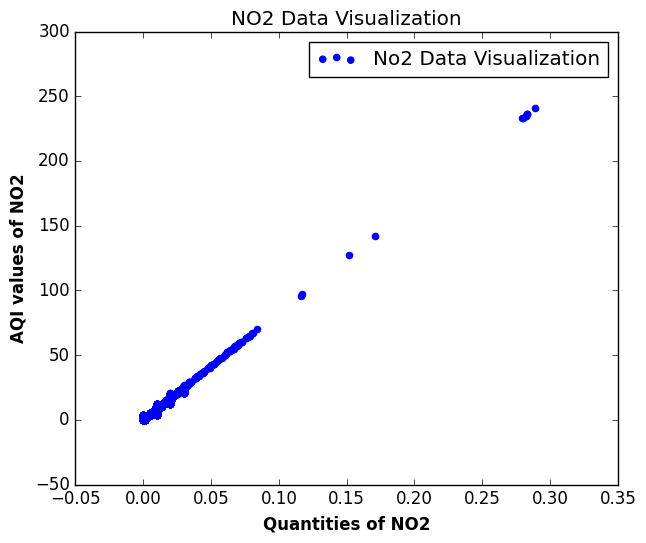

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(no2, aqi_no2, label="No2 Data Visualization", color="blue")
plt.xlabel("Quantities of NO2", weight="bold")
plt.ylabel("AQI values of NO2", weight="bold")
plt.title("NO2 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('No2_data_visualization.jpg')






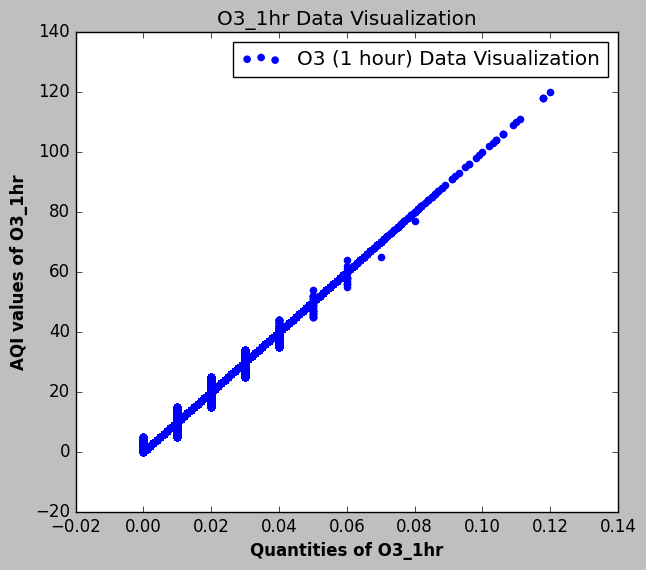

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_1hr, aqi_o3_1hr, label="O3 (1 hour) Data Visualization", color="blue")
plt.xlabel("Quantities of O3_1hr", weight="bold")
plt.ylabel("AQI values of O3_1hr", weight="bold")
plt.title("O3_1hr Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('o3_1hr_data_visualization.jpg')

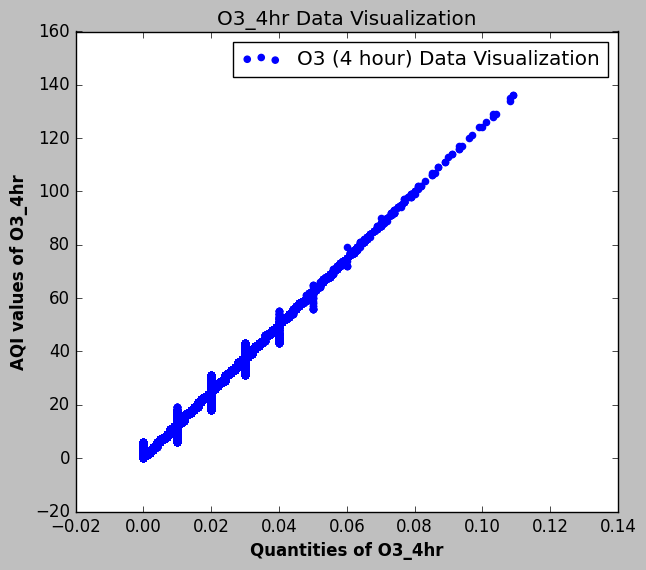

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_4hr, aqi_o3_4hr, label="O3 (4 hour) Data Visualization", color="blue")
plt.xlabel("Quantities of O3_4hr", weight="bold")
plt.ylabel("AQI values of O3_4hr", weight="bold")
plt.title("O3_4hr Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('o3_4hr_data_visualization.jpg')

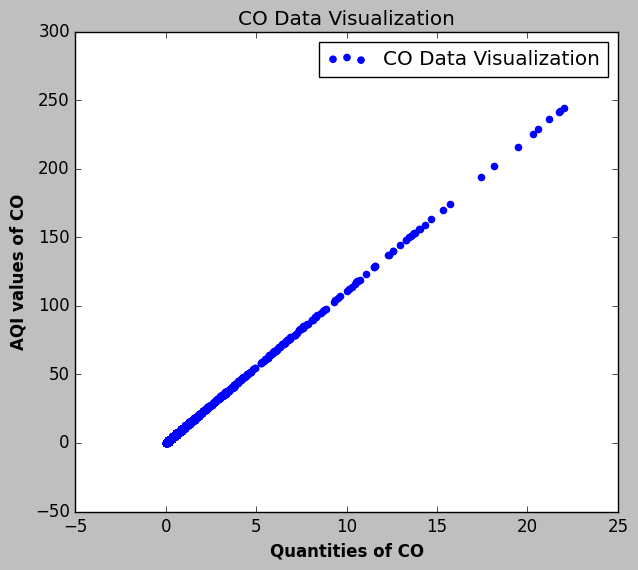

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(co, aqi_co, label="CO Data Visualization", color="blue")
plt.xlabel("Quantities of CO", weight="bold")
plt.ylabel("AQI values of CO", weight="bold")
plt.title("CO Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('CO_data_visualization.jpg')

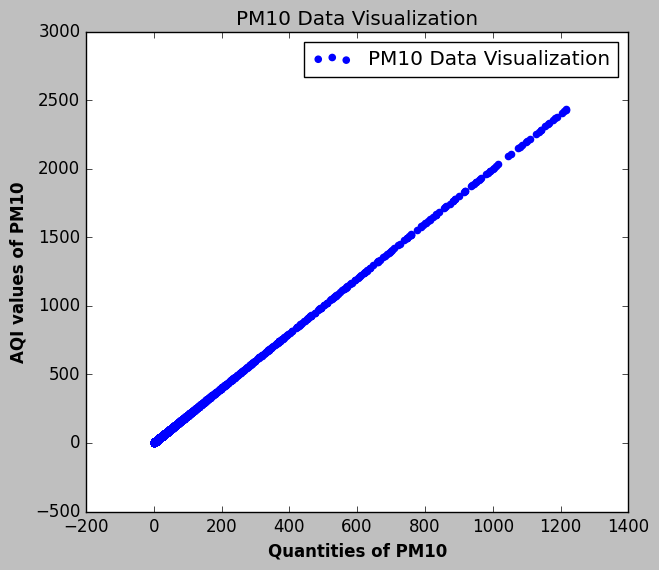

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm10, aqi_pm10, label="PM10 Data Visualization", color="blue")
plt.xlabel("Quantities of PM10", weight="bold")
plt.ylabel("AQI values of PM10", weight="bold")
plt.title("PM10 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_data_visualization.jpg')

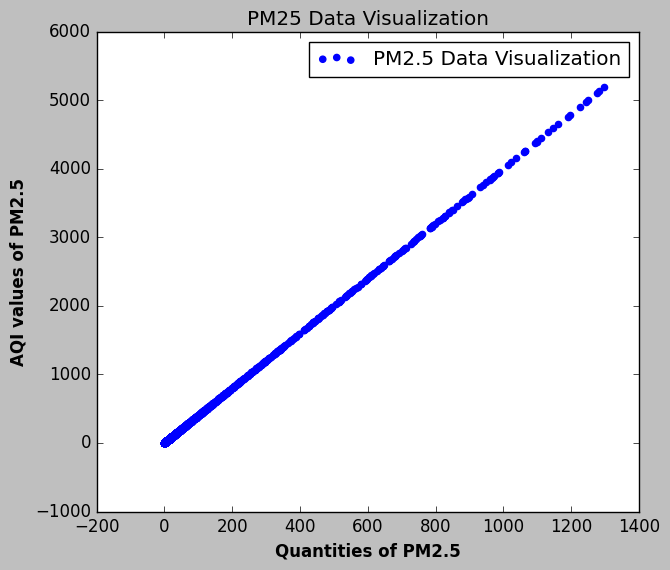

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm25, aqi_pm25, label="PM2.5 Data Visualization", color="blue")
plt.xlabel("Quantities of PM2.5", weight="bold")
plt.ylabel("AQI values of PM2.5", weight="bold")
plt.title("PM25 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('pm25_data_visualization.jpg')

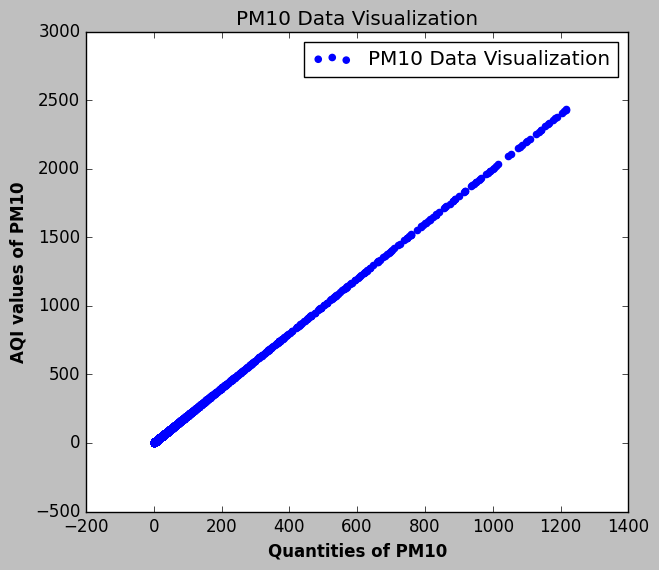

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm10, aqi_pm10, label="PM10 Data Visualization", color="blue")
plt.xlabel("Quantities of PM10", weight="bold")
plt.ylabel("AQI values of PM10", weight="bold")
plt.title("PM10 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_data_visualization.jpg')

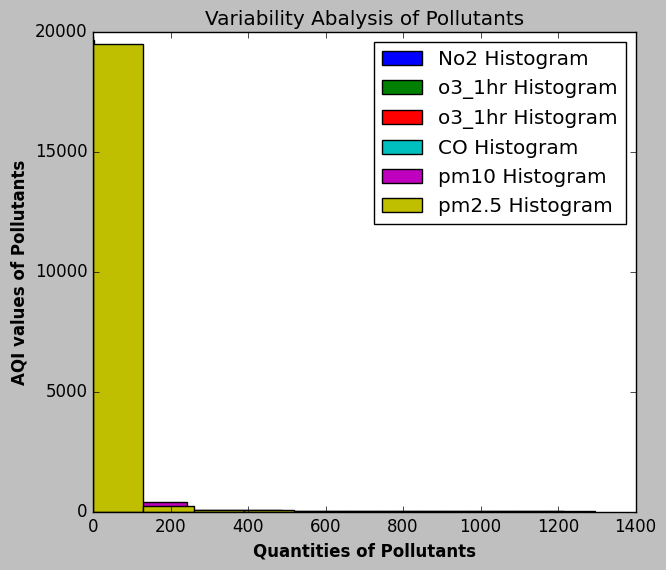

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.hist(no2, label="No2 Histogram")
plt.hist(o3_1hr, label="o3_1hr Histogram")
plt.hist(o3_4hr, label="o3_1hr Histogram")
plt.hist(co, label="CO Histogram")
plt.hist(pm10, label="pm10 Histogram")
plt.hist(pm25, label="pm2.5 Histogram")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('data_visualization.jpg')

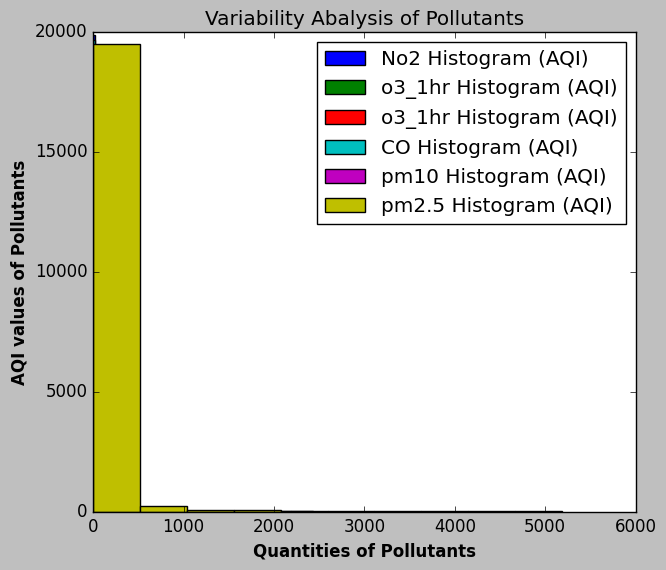

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.hist(aqi_no2, label="No2 Histogram (AQI)")
plt.hist(aqi_o3_1hr, label="o3_1hr Histogram (AQI)")
plt.hist(aqi_o3_4hr, label="o3_1hr Histogram (AQI)")
plt.hist(aqi_co, label="CO Histogram (AQI)")
plt.hist(aqi_pm10, label="pm10 Histogram (AQI)")
plt.hist(aqi_pm25, label="pm2.5 Histogram (AQI)")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Variability Abalysis of Pollutants.jpg')

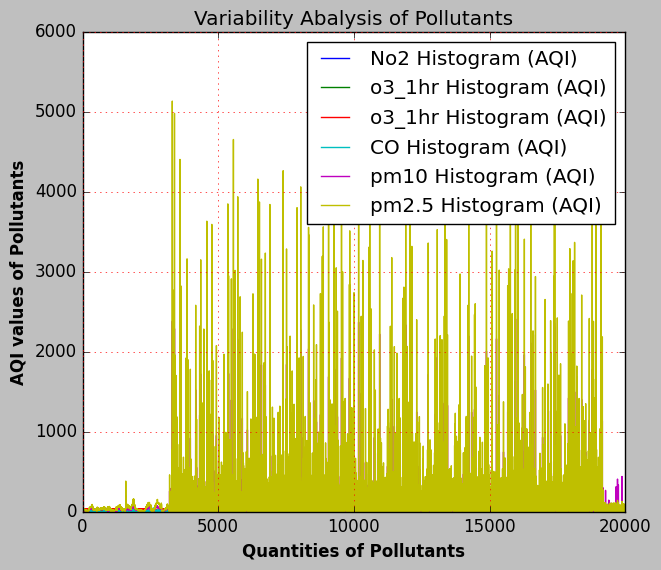

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.plot(aqi_no2, label="No2 Histogram (AQI)")
plt.plot(aqi_o3_1hr, label="o3_1hr Histogram (AQI)")
plt.plot(aqi_o3_4hr, label="o3_1hr Histogram (AQI)")
plt.plot(aqi_co, label="CO Histogram (AQI)")
plt.plot(aqi_pm10, label="pm10 Histogram (AQI)")
plt.plot(aqi_pm25, label="pm2.5 Histogram (AQI)")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()
plt.grid(color="red")
mpl.rcParams.update({'font.size':14})
plt.savefig('Variability Abalysis of Pollutants.jpg')

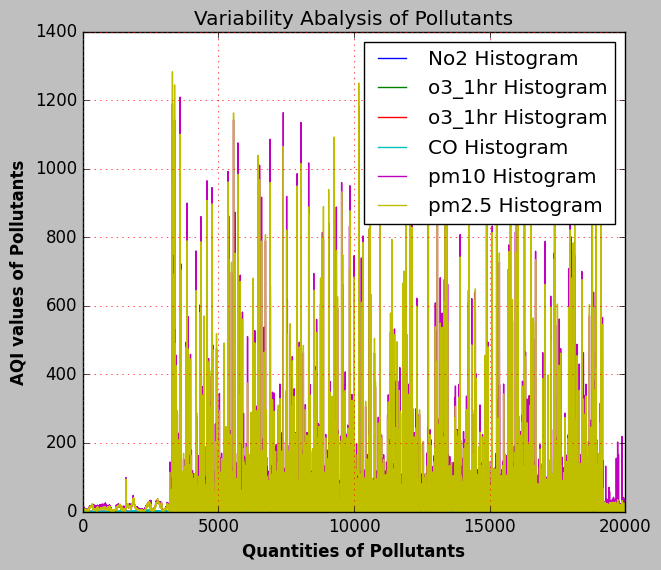

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.plot(no2, label="No2 Histogram")
plt.plot(o3_1hr, label="o3_1hr Histogram")
plt.plot(o3_4hr, label="o3_1hr Histogram")
plt.plot(co, label="CO Histogram")
plt.plot(pm10, label="pm10 Histogram")
plt.plot(pm25, label="pm2.5 Histogram")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()
plt.grid(color="red")
mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_data_visualization.jpg')

In [ ]:
no2_train,no2_test, aqi_no2_train, aqi_no2_test = train_test_split(no2, aqi_no2, test_size=1/3)




In [ ]:
print("no of training data", len(no2_train))
print("no of testing data", len(no2_test))
print("no of AQI training data", len(aqi_no2_train))
print("no of AQI testing data", len(aqi_no2_test))

no of training data 13324
no of testing data 6663
no of AQI training data 13324
no of AQI testing data 6663


In [ ]:
no2_lr = LinearRegression()

In [ ]:
no2_lr.fit(no2_train, aqi_no2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
no2_lr.score(no2_train, aqi_no2_train) #Training Accuracy

0.9808950161448228

In [ ]:
no2_lr.score(no2_test, aqi_no2_test) #Testing Accuracy

0.9733511557011577

In [ ]:
no2_lr.score(data_new.iloc[:,3:4], data_new.iloc[:, 10:11]) #raw data accuracy

0.9788315423536385

In [ ]:
no2_lr.score(no2, aqi_no2) #overall processed data

0.9788315423536385

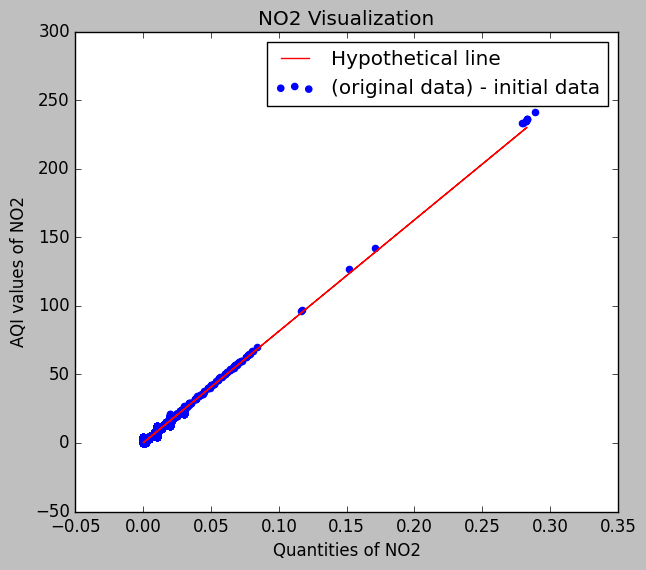

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(no2, aqi_no2, label="(original data) - initial data", color="blue")
plt.plot(no2_test, no2_lr.predict(no2_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of NO2")
plt.ylabel("AQI values of NO2")
plt.title("NO2 Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('No2_Prediction_visualization.jpg')


In [ ]:
co_train, co_test, aqi_co_train, aqi_co_test = train_test_split(co, aqi_co, test_size=1/3, random_state=101)

co_lr = LinearRegression()


print("no of training data", len(co_train))
print("no of testing data", len(co_test))
print("no of AQI training data", len(aqi_co_train))
print("no of AQI testing data", len(aqi_co_test))



no of training data 13324
no of testing data 6663
no of AQI training data 13324
no of AQI testing data 6663


In [ ]:
co_lr.fit(co_train, aqi_co_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
co_lr.score(co_train, aqi_co_train)     #Training Accuracy

0.998891857449471

In [ ]:
co_lr.score(co_test, aqi_co_test)  

0.9990217630599413

In [ ]:
co_lr.score(data_new.iloc[:,6:7], data_new.iloc[:, 9:10])  

0.9989390223439328

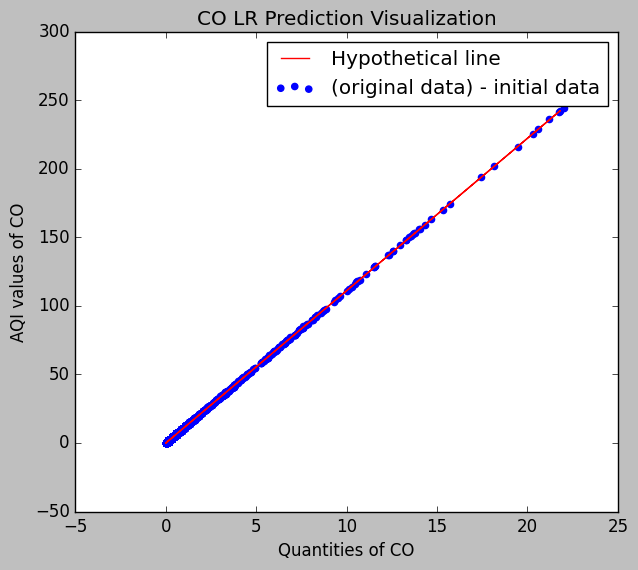

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(co, aqi_co, label="(original data) - initial data", color="blue")
plt.plot(co_test, co_lr.predict(co_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of CO")
plt.ylabel("AQI values of CO")
plt.title("CO LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('CO_Prediction_visualization.jpg')

In [ ]:
o3_1hr_train,o3_1hr_test, aqi_o3_1hr_train, aqi_o3_1hr_test = train_test_split(o3_1hr, aqi_o3_1hr, test_size=1/3, random_state=100)
o3_4hr_train,o3_4hr_test, aqi_o3_4hr_train, aqi_o3_4hr_test = train_test_split(o3_4hr, aqi_o3_4hr, test_size=1/3, random_state=100)
pm10_train,pm10_test, aqi_pm10_train, aqi_pm10_test = train_test_split(pm10, aqi_pm10, test_size=1/3, random_state=100)
pm25_train,pm25_test, aqi_pm25_train, aqi_pm25_test = train_test_split(pm25, aqi_pm25, test_size=1/3, random_state=100)

In [ ]:
o3_lhr_lr = LinearRegression()
o3_4hr_lr = LinearRegression()
pm10_lr = LinearRegression()
pm25_lr = LinearRegression()


print("no of training data", len(o3_1hr_train))
print("no of testing data", len(o3_1hr_test))
print("no of AQI training data", len(aqi_o3_1hr_train))
print("no of AQI testing data", len(aqi_o3_1hr_test))

no of training data 13324
no of testing data 6663
no of AQI training data 13324
no of AQI testing data 6663


In [ ]:
o3_lhr_lr.fit(o3_1hr_train, aqi_o3_1hr_train)
o3_4hr_lr.fit(o3_4hr_train, aqi_o3_4hr_train)
pm10_lr.fit(pm10_train, aqi_pm10_train)
pm25_lr.fit(pm25_train, aqi_pm25_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

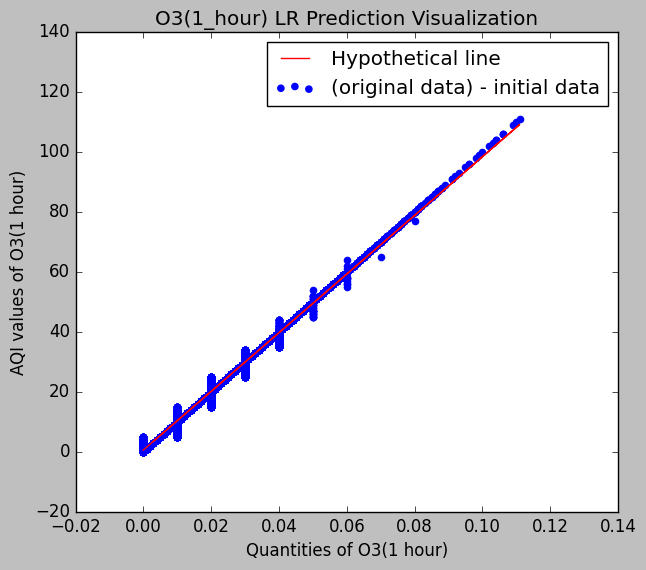

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_1hr, aqi_o3_1hr, label="(original data) - initial data", color="blue")
plt.plot(o3_1hr_test, o3_lhr_lr.predict(o3_1hr_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of O3(1 hour)")
plt.ylabel("AQI values of O3(1 hour)")
plt.title("O3(1_hour) LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('O3_1hr_Prediction_visualization.jpg')

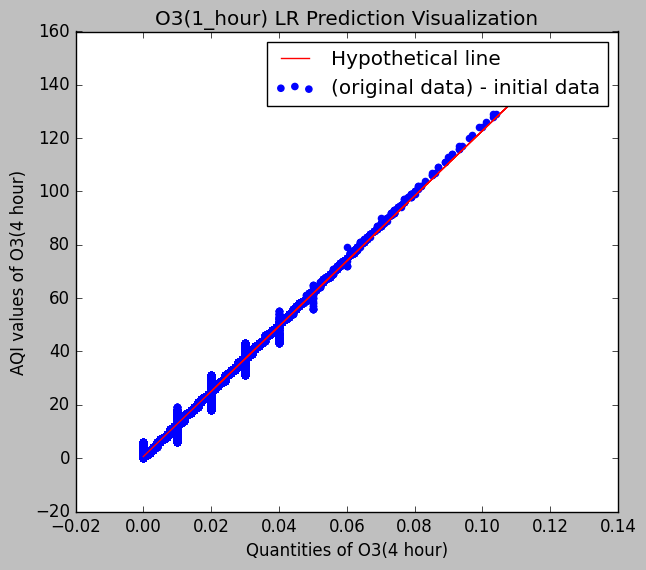

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_4hr, aqi_o3_4hr, label="(original data) - initial data", color="blue")
plt.plot(o3_4hr_test, o3_4hr_lr.predict(o3_4hr_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of O3(4 hour)")
plt.ylabel("AQI values of O3(4 hour)")
plt.title("O3(1_hour) LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('O3_4hr_Prediction_visualization.jpg')

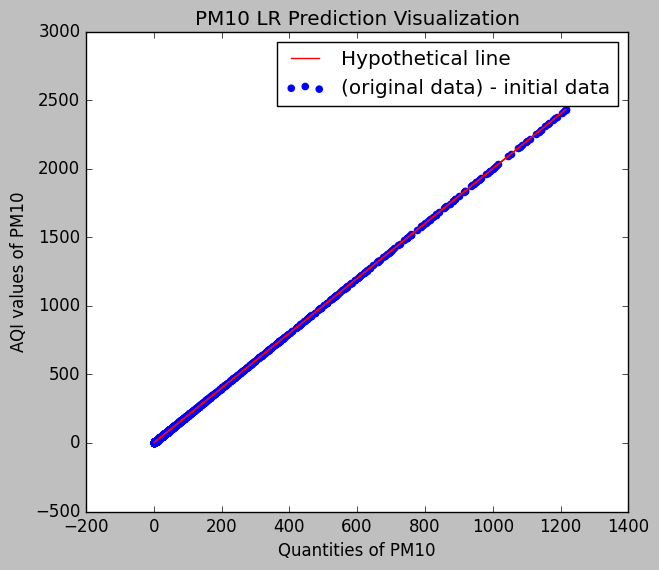

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm10, aqi_pm10, label="(original data) - initial data", color="blue")
plt.plot(pm10_test, pm10_lr.predict(pm10_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of PM10")
plt.ylabel("AQI values of PM10")
plt.title("PM10 LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_Prediction_visualization.jpg')

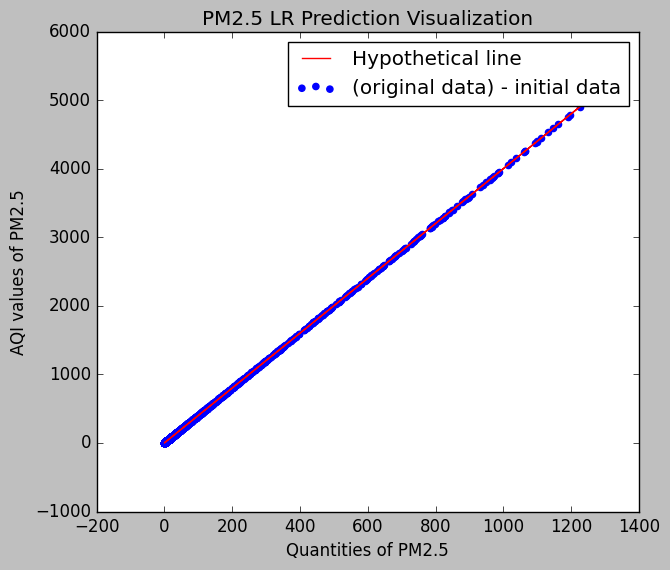

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm25, aqi_pm25, label="(original data) - initial data", color="blue")
plt.plot(pm25_test, pm25_lr.predict(pm25_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of PM2.5")
plt.ylabel("AQI values of PM2.5")
plt.title("PM2.5 LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('pm2_5_Prediction_visualization.jpg')

In [ ]:
Weights = [no2_lr.coef_ , co_lr.coef_ , pm25_lr.coef_ , pm10_lr.coef_ , o3_lhr_lr.coef_ , o3_4hr_lr.coef_]
Weights_name = ["NO2" , "CO" , "PM 2.5" , "PM 10" , "O3 (1hrs)" , "O3 (4hrs)"]

In [ ]:
Weights

[array([[812.64618858]]),
 array([[11.11028786]]),
 array([[4.00034224]]),
 array([[2.00030034]]),
 array([[977.64769011]]),
 array([[1221.65323978]])]

In [ ]:

AQI_Parameter = [Weights_name , Weights]

In [ ]:
AQI_Parameter

[['NO2', 'CO', 'PM 2.5', 'PM 10', 'O3 (1hrs)', 'O3 (4hrs)'],
 [array([[812.64618858]]),
  array([[11.11028786]]),
  array([[4.00034224]]),
  array([[2.00030034]]),
  array([[977.64769011]]),
  array([[1221.65323978]])]]

In [ ]:
#AQI is summation of all pollutants

no2_pred = no2_lr.predict(no2_test)
pm10_pred = pm10_lr.predict(pm10_test)
pm25_pred = pm25_lr.predict(pm25_test)
co_pred = co_lr.predict(co_test)
o3_1hr_pred = o3_lhr_lr.predict(o3_1hr_test)
o3_4hr_pred = o3_4hr_lr.predict(o3_4hr_test)

In [ ]:
print(no2_pred)


[[20.43795699]
 [ 8.24826416]
 [ 0.93444846]
 ...
 [ 0.93444846]
 [ 4.99767941]
 [ 3.37238703]]


In [ ]:
print(pm10_pred)


[[14.47083947]
 [21.87195073]
 [67.47879851]
 ...
 [55.27696643]
 [31.27336234]
 [17.87135005]]


In [ ]:
print(pm25_pred)


[[13.87410505]
 [31.87564512]
 [80.67982042]
 ...
 [33.07574779]
 [41.07643227]
 [20.67468686]]


In [ ]:
print(o3_1hr_pred)


[[ 0.4774817 ]
 [17.09749243]
 [12.20925398]
 ...
 [23.94102626]
 [20.0304355 ]
 [ 3.41042477]]


In [ ]:
print(o3_4hr_pred)


[[ 0.60029275]
 [20.14674458]
 [11.5951719 ]
 ...
 [31.14162374]
 [25.03335754]
 [23.8117043 ]]


In [ ]:
print(aqi_no2_pred)

NameError: ignored

In [ ]:
print(aqi_co_pred)

In [ ]:
print(aqi_pm10_pred)

In [ ]:
print(aqi_pm25_pred)

In [ ]:
print(aqi_o3_1hr_pred)

In [ ]:
print(aqi_o3_4hr_pred)

In [ ]:
plt.scatter(no2, aqi_no2, label="initial data", color="blue")

plt.scatter(no2_test, no2_pred, label="test data", color="red")
plt.plot(no2_test, no2_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant")
plt.ylabel("Quantities of Pollutant")
plt.title("NO2 LR Prediction")
plt.legend()




In [ ]:
plt.scatter(co, aqi_co, label="initial data", color="blue")

plt.scatter(co_test, co_pred, label="test data", color="red")
plt.plot(co_test, co_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data)CO")
plt.ylabel("Quantities of Pollutant(test data) CO")
plt.title("NO2 LR Prediction")
plt.legend()

In [ ]:
plt.scatter(pm10, aqi_pm10, label="initial data", color="blue")
plt.scatter(pm10_test, pm10_pred, label="test data", color="red")
plt.plot(pm10_test, pm10_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) PM10")
plt.ylabel("Quantities of Pollutant(test data) PM10")
plt.title("PM10 LR Prediction")
plt.legend()

In [ ]:
plt.scatter(pm25, aqi_pm25, label="initial data", color="blue")
plt.scatter(pm25_test, pm25_pred, label="test data", color="red")
plt.plot(pm25_test, pm25_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) PM25")
plt.ylabel("Quantities of Pollutant(test data) PM25")
plt.title("PM25 LR Prediction")
plt.legend()

In [ ]:
plt.scatter(o3_1hr, aqi_o3_1hr, label="initial data", color="blue")
plt.scatter(o3_1hr_test, o3_1hr_pred, label="test data", color="red")
plt.plot(o3_1hr_test, o3_1hr_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) o3_1hr")
plt.ylabel("Quantities of Pollutant(test data) o3_1hr")
plt.title("o3_1hr LR Prediction")
plt.legend()

In [ ]:
plt.scatter(o3_4hr, aqi_o3_4hr, label="initial data", color="blue")
plt.scatter(o3_4hr_test, o3_4hr_pred, label="test data", color="red")
plt.plot(o3_4hr_test, o3_4hr_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) o3_4hr")
plt.ylabel("Quantities of Pollutant(test data) o3_4hr")
plt.title("o3_4hr LR Prediction")
plt.legend()

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(no2_test, no2_pred), "%")


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(co_test, co_pred), "%")

In [ ]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(no2_test, no2_pred)
mape

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(pm25_test, pm25_pred), "%")

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(o3_1hr_test, o3_1hr_pred), "%")

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(o3_4hr_test, o3_4hr_pred), "%")

In [ ]:
print(metrics.mean_squared_error(o3_4hr_test, o3_4hr_pred), "%")